## Importing the Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Randomly Selecting 24 colors as the input vectors

In [ ]:
colors = np.array([255,0,0,255,99,71,255,140,0,255,165,0,0,128,128,124,252,0,0,100,0,102,205,170,152,251,152,
                   0,255,255,25,25,112,72,61,139,224,255,255,218,165,32,255,140,0,176,224,230,95,158,160,70,130,
                   180,30,144,255,25,25,112,65,105,225,0,255,255,255,0,255,255,255,224])

### Normalizing the Data

In [ ]:
colors = colors.reshape([24,3])
print(colors)
colors = colors/255

[[255   0   0]
 [255  99  71]
 [255 140   0]
 [255 165   0]
 [  0 128 128]
 [124 252   0]
 [  0 100   0]
 [102 205 170]
 [152 251 152]
 [  0 255 255]
 [ 25  25 112]
 [ 72  61 139]
 [224 255 255]
 [218 165  32]
 [255 140   0]
 [176 224 230]
 [ 95 158 160]
 [ 70 130 180]
 [ 30 144 255]
 [ 25  25 112]
 [ 65 105 225]
 [  0 255 255]
 [255   0 255]
 [255 255 224]]


In [ ]:
np.random.seed(2)
class som():
    def __init__(self,e,x=100,y=100,i_dimen=3,lr=0.8,s=1):
        self.n = x
        self.m = y
        self.i = i_dimen
        self.sigma = s
        self.epoch = e 
        self.lr = lr
        
    def initializeweights(self):
        s = self.n
        r = self.m
        i = self.i
        self.weights = np.random.uniform(0,1,size=(s,r,i))
        plt.title("Random Weights Grid")
        plt.imshow(self.weights)
        plt.show()
    
    def Euclidean_distance(self,x,y):
        return np.linalg.norm(x-y, axis =2)**2
    
    def winning_neuron(self,e):
        least_value = np.amin(e)
        index = np.where(e == least_value)
        return index

    def shrink_function(self,k):
        return self.sigma*np.exp(-k/self.epoch)
                    
    def neighbours(self,w_i,k):
        w = np.indices((self.n,self.m))
        w[0] = w_i[0]-w[0]
        w[1] = w_i[1]-w[1]
        dist = np.linalg.norm(w, axis = 0)
        n = np.exp(-(dist**2)/(2*(self.shrink_function(k)**2)))
        return n
    
    def decayinglr(self,k):
        l = self.lr*np.exp(-k/self.epoch)
        return l
        
    def train(self,color):
        fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
        count = 0
        epochs =[20,40,100,1000]
        for i in range(self.epoch):
            for c in range(len(color)):
                distance_x_n = self.Euclidean_distance(color[c],self.weights)
                winning_index = self.winning_neuron(distance_x_n)
                h = self.neighbours(winning_index,i+1)
                h = np.dstack([h]*3)
                lr_new = self.decayinglr(i+1)
                self.weights = self.weights + (lr_new*h*(color[c]-self.weights))
            if i+1 in epochs:
                plt.sca(axs[count])
                plt.title("No.of Epochs:"+str(i+1) + " Sigma0 value: "+ str(self.sigma))
                plt.imshow(self.weights)
                count = count + 1
        plt.show()
        return self.weights

##  Generating a figure of the original grid (random weights) followed by figures of the SOM after 20, 40, 100, 1000

## Sigma Values can be Changed in the below list to test the model

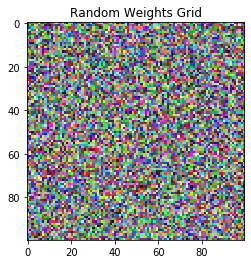

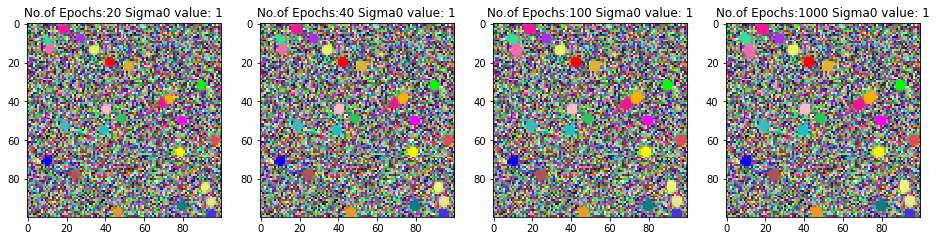

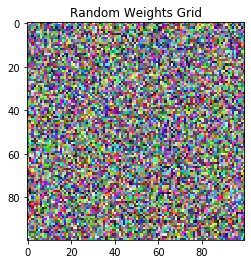

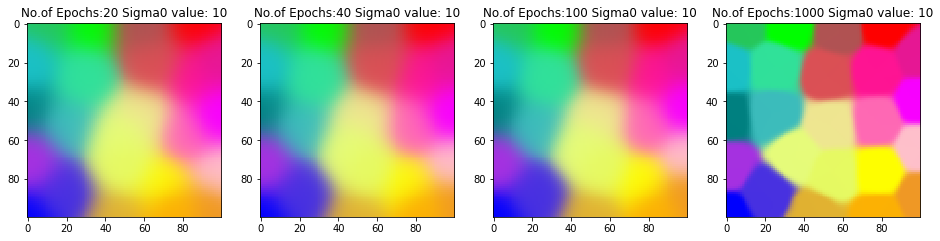

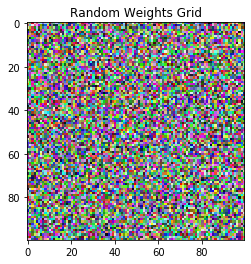

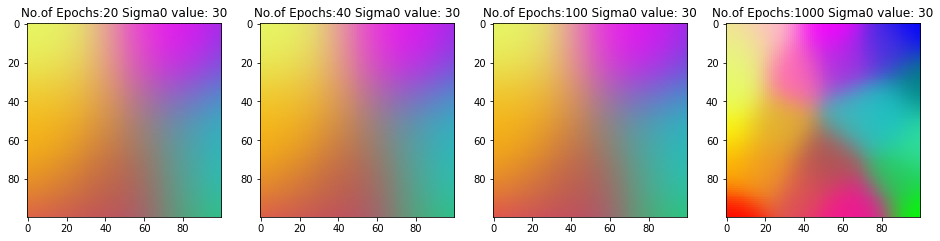

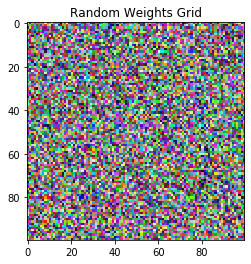

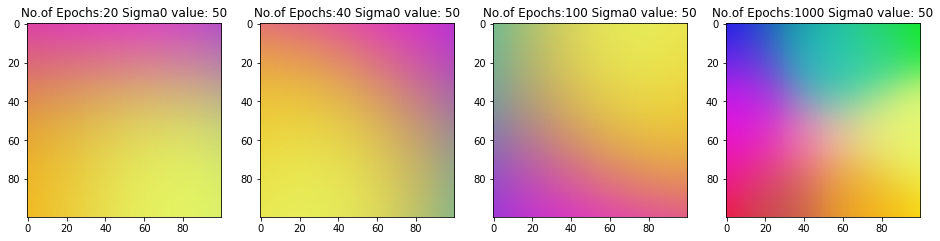

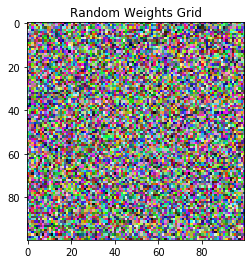

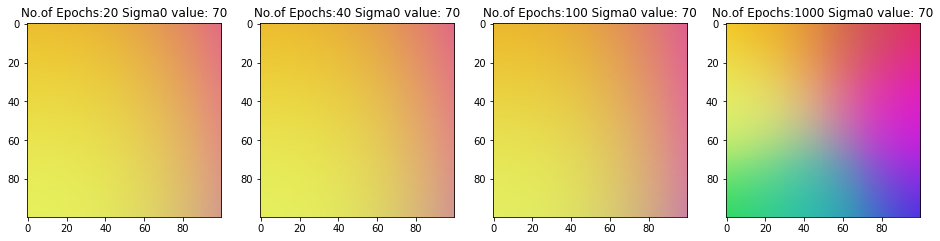

In [ ]:
x_dim=100
y_dim=100
features=3
lr=0.8
#Initializing Different Sigma values
sigma=[1,10,30,50,70]
for i in sigma:
    obj = som(1000,x_dim,y_dim,features,lr,i)
    obj.initializeweights()
    weights= obj.train(colors1)

### Analysis and Observations
 
The above plots Generates a figure for Random weights followed by the figures of SOM after 20, 40, 100, 1000 Epochs and Sigma0 Ranging 1,10,30,50,70

### Effect of Sigma0

As the sigma0 value is increased, the Neighbourhood Nij spread also increases. This indicates that when the sigma0 value is less the indices very near to the least distance index get updated and the rest tend to zero. This is the reason we see dots in our figures. On the contrary when sigma0 is not too less or not too high, the neighbourhood spread is more and as we increase the number of epochs there is clear demarcation between the 24 colors as seen in the case of sigma0 =10.
Large sigma0 value would lead the colors to blend more because Neighbourhood starts to increase in a way that will influence the index. This is seen when sigma0 = 30, the colors start blending but when the sigma0 is increased even more to 50 and 70 they cpmpletely blend.


### Effect of Number of Epochs

We can observe that as the number of Epochs increase, the colors colors are more defined. The reason being that when we train, on each epoch we are considering the 24 inputs and for each of the input we are computing the winning neuron and updating the weights of the neighbourhood neurons as well, this indicates that weights start getting closer to the data color. At the end of each epoch the value of Nij and learning rate get affected, the neighbourhood function reduces, as the sigma reduces.
From this we can conclude that the effect of the data at the first epoch on the neighbours is more than the influence of the same data at any epoch greater than 1. This is also the reason why as the number of epoch increases the colors starts to blend in and is well defined.
